<a href="https://colab.research.google.com/github/ahcamachod/1918-machine-learning-clasificacion-con-sklearn/blob/proyecto-final/ML_clasificacion_con_SKLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning: Clasificación con SKLearn**

En este notebook estaremos desarrollando varios ejercicios para entender cómo funcionan algunos algoritmos de clasificación.


## Aula 1: Introducción a la clasificación.

In [2]:
# features 1 = sí y 0= no
# tiene el pelo largo?
# tiene las uñas afiladas?
# hace miau?

perro1= [0,1,1]
perro2= [1,0,1]
perro3= [1,1,1]

gato1= [0,1,0]
gato2= [0,1,1]
gato3= [1,1,0]

x_train= [perro1, perro2, perro3, gato1, gato2, gato3]
y_train = [1,1,1,0,0,0]

In [3]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(x_train,y_train)
# Entrena el modelo con 2 listas, intentando permitir que diferencia entre perro(1) y gato(0)

LinearSVC()

In [4]:
animal_misterioso= [1,1,1]
model.predict([animal_misterioso])
# Predice si es un perro o un gato

array([1])

In [5]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

x_test = [misterio1, misterio2, misterio3]
y_test = [0,1,1]

In [12]:
previsiones = model.predict(x_test)
model.predict(x_test)
# Predice si es un perro o un gato, pero lo predice mal, ya que deberia dar 0, 1, 1

array([1, 0, 1])

In [10]:
correctos = (previsiones==y_test).sum()
# Si la prevision de la maquina es igual al resultado de y_test, se suma a la cantidad de correctos
total = len(x_test)
tasa_de_acierto = correctos/total
# Calcula el porcentaje de acierto de la maquina
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de: 33.33%


In [13]:
from sklearn.metrics import accuracy_score
#                               (Valor real, Valor estimado)
tasa_de_acierto = accuracy_score(y_test, previsiones)
# Calcula el porcentaje de acierto de la maquina
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de: 33.33%


## Aula 2: Pruebas replicables, estratificación, lectura de datos de internet.

In [14]:
import pandas as pd
uri = 'https://gist.githubusercontent.com/ahcamachod/38673f75b54ec62ffc290eff8e7c716e/raw/6eaa07e199d9f668bf94a034cb84dac58c82fa4f/tracking.csv'
datos = pd.read_csv(uri)
datos.sample(5)

,home,how_it_works,contact,bought
85,1,1,0,0
7,1,0,1,1
58,1,0,1,1
46,1,0,1,1
47,1,0,1,1


In [15]:
mapa = {
          "home":"principal",
          "how_it_works":"como_funciona",
          "contact":"contacto",
          "bought":"compro"
        }

datos = datos.rename(columns=mapa)
datos.sample(3)

,principal,como_funciona,contacto,compro
23,0,1,0,0
60,1,0,1,1
22,0,0,1,0


In [16]:
x = datos[['principal','como_funciona','contacto']]
x.head()

,principal,como_funciona,contacto
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [17]:
y = datos.compro
y.head()

0    0
1    0
2    0
3    0
4    0
Name: compro, dtype: int64

In [18]:
datos.shape

(99, 4)

In [19]:
x_train = x[:75]
y_train = y[:75]
x_test = x[75:]
y_test = y[75:]

In [21]:
y_train.value_counts()

0    48
1    27
Name: compro, dtype: int64

In [22]:
27/75

0.36

In [23]:
y_test.value_counts()

0    18
1     6
Name: compro, dtype: int64

In [24]:
6/24

0.25

In [25]:
print(f"Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos.")

Entrenaremos con 75 elementos y probaremos con 24 elementos.


In [26]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


model = LinearSVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de: 95.83%


In [28]:
from sklearn.model_selection import train_test_split

SEED=42
# Estado de aleatoriedad

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=SEED)

model = LinearSVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de: 96.0%


In [29]:
from sklearn.model_selection import train_test_split

SEED=42

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=SEED, stratify=y)

model = LinearSVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de: 96.0%


In [31]:
y_train.value_counts()

0    49
1    25
Name: compro, dtype: int64

In [33]:
25/74

0.33783783783783783

In [34]:
y_test.value_counts()

0    17
1     8
Name: compro, dtype: int64

In [25]:
8/25

0.32

## Aula 3: Proyecto de baja dimensionalidad y Baseline

In [35]:
uri = 'https://gist.githubusercontent.com/ahcamachod/7c55640f0d65bcbd31bb986bb599180c/raw/1b616e97a8719b3ff245fcdd68eaebdb8da38082/projects.csv'

datos = pd.read_csv(uri)
datos.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [38]:
mapa = {
        'unfinished':'no_finalizado',
        'expected_hours':'horas_esperadas',
        'price':'precio'
        }

datos = datos.rename(columns=mapa)
datos.sample(3)

,no_finalizado,horas_esperadas,precio
2036,0,29,254
1359,0,87,14838
545,1,51,722


In [39]:
cambio = {1:0, 0:1}

datos['finalizado'] = datos.no_finalizado.map(cambio)

In [40]:
datos.sample(5)

,no_finalizado,horas_esperadas,precio,finalizado
907,1,51,414,0
559,1,50,318,0
1455,0,37,448,1
742,1,26,164,0
1945,0,35,397,1


<Axes: xlabel='horas_esperadas', ylabel='precio'>

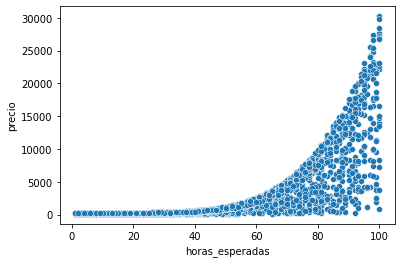

In [41]:
import seaborn as sns

sns.scatterplot(x='horas_esperadas', y='precio', data=datos)
# Grafico de dispercion

<Axes: xlabel='horas_esperadas', ylabel='precio'>

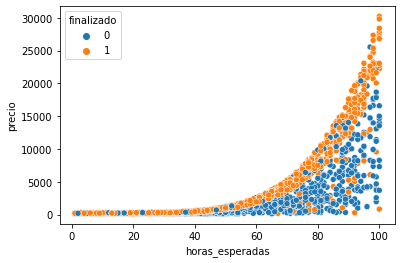

In [42]:
sns.scatterplot(x='horas_esperadas', y='precio', hue='finalizado', data=datos)
# Grafico de dispercion

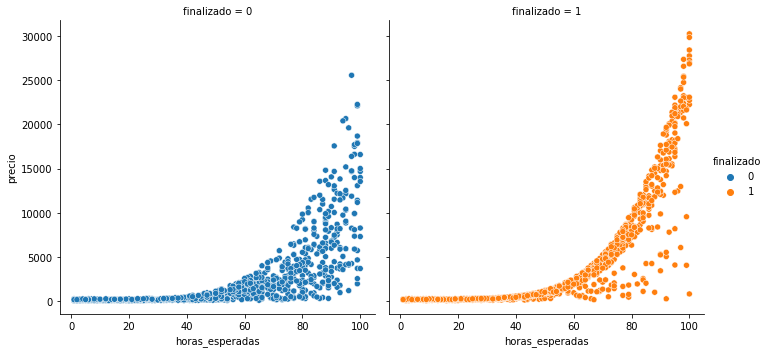

In [43]:
sns.relplot(x='horas_esperadas', y='precio', hue='finalizado', data=datos, col='finalizado')

In [45]:
import numpy as np

x= datos[['horas_esperadas','precio']]
y= datos.finalizado

SEED = 42
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f"Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos.")

model = LinearSVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

Entrenaremos con 1617 elementos y probaremos con 540 elementos.
La tasa de acierto fue de: 57.59%


C:\Users\ezegi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [49]:
base_previsiones = np.ones(540)
tasa_de_acierto = accuracy_score(y_test, base_previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de: 52.59%


<Axes: xlabel='horas_esperadas', ylabel='precio'>

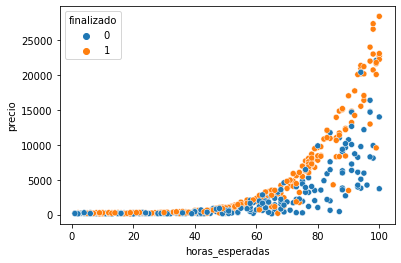

In [50]:
sns.scatterplot(x='horas_esperadas', y='precio', hue=y_test, data=x_test)

In [51]:
x_min = x_test.horas_esperadas.min()
x_max = x_test.horas_esperadas.max()
y_min = x_test.precio.min()
y_max = x_test.precio.max()

In [52]:
pixels = 100
eje_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eje_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

In [53]:
xx, yy = np.meshgrid(eje_x, eje_y)
puntos = np.c_[xx.ravel(), yy.ravel()]
# Ravle: Toma una matriz y la vuelve un vector
puntos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.811502e+04],
       [9.802000e+01, 2.811502e+04],
       [9.901000e+01, 2.811502e+04]])

In [54]:
Z = model.predict(puntos)

C:\Users\ezegi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [55]:
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

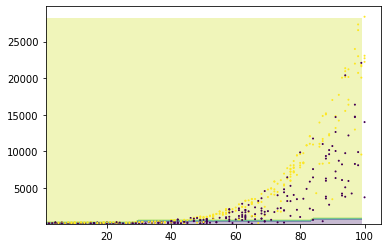

In [56]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x_test.horas_esperadas, x_test.precio, c=y_test, s=1)

## Aula 4: Support Vector Machines y sistemas no lineales.

Entrenaremos con 1617 elementos y probaremos con 540 elementos.
La tasa de acierto fue de: 67.78%


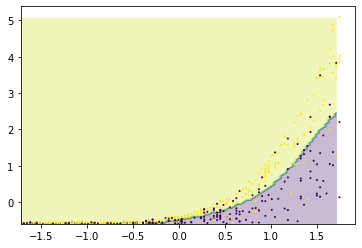

In [57]:
from sklearn.svm import SVC
# Modelo no lineal, con curva
from sklearn.preprocessing import StandardScaler

x= datos[['horas_esperadas','precio']]
y= datos.finalizado

SEED = 42
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f"Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos.")

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = SVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

data_x = x_test[:,0]
# Columna 0 = Horas esperadas
data_y = x_test[:,1]
# Columna 1 = Precio

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eje_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eje_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

xx, yy = np.meshgrid(eje_x, eje_y)
puntos = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(puntos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=y_test, s=1)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

## Aula 5: Dummy classifiers y árboles de decisión.

In [58]:
uri = 'https://gist.githubusercontent.com/ahcamachod/1595316a6b37bf39baac355b081d9c3b/raw/98bc94de744764cef0e67922ddfac2a226ad6a6f/car_prices.csv'

datos = pd.read_csv(uri)
datos.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [59]:
mapa = {
        'mileage_per_year':'millas_por_ano',
        'model_year':'ano_del_modelo',
        'price':'precio',
        'sold':'vendido'
        }

datos = datos.rename(columns=mapa)
datos.sample(3)

,Unnamed: 0,millas_por_ano,ano_del_modelo,precio,vendido
4062,4062,12914,2001,91492.55,no
338,338,13175,2002,77450.66,no
7900,7900,9524,2004,70029.90,no


In [60]:
cambio = {'no':0, 'yes':1}

datos.vendido = datos.vendido.map(cambio)
datos.sample(3)

,Unnamed: 0,millas_por_ano,ano_del_modelo,precio,vendido
7825,7825,11850,2006,54526.09,0
1339,1339,7848,2003,66631.71,1
1685,1685,21406,2007,44578.12,1


In [61]:
from datetime import datetime

ano_actual = datetime.today().year
datos['edad_del_modelo'] = ano_actual - datos.ano_del_modelo
datos.sample(3)

,Unnamed: 0,millas_por_ano,ano_del_modelo,precio,vendido,edad_del_modelo
8290,8290,14255,2005,51606.00,1,18
8686,8686,21236,2006,37042.17,1,17
5642,5642,9998,2011,47241.59,1,12


In [62]:
datos['km_por_ano'] = datos.millas_por_ano * 1.60934
datos.sample(3)

,Unnamed: 0,millas_por_ano,ano_del_modelo,precio,vendido,edad_del_modelo,km_por_ano
100,100,17000,2002,45343.51,1,21,27358.78000
5228,5228,15933,2000,61608.05,0,23,25641.61422
3569,3569,13512,2000,39647.42,1,23,21745.40208


In [63]:
datos = datos.drop(columns=['Unnamed: 0', 'millas_por_ano','ano_del_modelo'], axis=1)
datos.sample(3)

,precio,vendido,edad_del_modelo,km_por_ano
689,47870.87,1,16,43307.33940
4978,35042.75,1,10,25730.12792
3483,39458.06,1,12,20506.21028


In [64]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

x= datos[['edad_del_modelo','km_por_ano', 'precio']]
y= datos.vendido

SEED = 42
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f"Entrenaremos con {len(raw_x_train)} elementos y probaremos con {len(raw_x_test)} elementos.")

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = SVC()
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

Entrenaremos con 7500 elementos y probaremos con 2500 elementos.
La tasa de acierto fue de: 76.04%


In [65]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='stratified')
dummy.fit(x_train,y_train)
exactitud = dummy.score(x_test,y_test)*100
print(f'La exactitud del clasificador Dummy stratified fue: {round(exactitud,2)}%')

La exactitud del clasificador Dummy stratified fue: 52.64%


In [68]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(x_train,y_train)
exactitud = dummy.score(x_test,y_test)*100
print(f'La exactitud del clasificador Dummy most_frequent fue: {round(exactitud,2)}%')

La exactitud del clasificador Dummy most_frequent fue: 58.0%


In [69]:
# Usando StandardScaler()

from sklearn.tree import DecisionTreeClassifier

x= datos[['edad_del_modelo','km_por_ano', 'precio']]
y= datos.vendido

SEED = 42
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f"Entrenaremos con {len(raw_x_train)} elementos y probaremos con {len(raw_x_test)} elementos.")

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

Entrenaremos con 7500 elementos y probaremos con 2500 elementos.
La tasa de acierto fue de: 78.04%


In [70]:
# Sin estandarizar

from sklearn.tree import DecisionTreeClassifier

x= datos[['edad_del_modelo','km_por_ano', 'precio']]
y= datos.vendido

SEED = 42
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f"Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos.")

model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

Entrenaremos con 7500 elementos y probaremos con 2500 elementos.
La tasa de acierto fue de: 78.04%


In [72]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, feature_names=features, filled=True, rounded=True, class_names=['No','Sí'])
grafico = graphviz.Source(dot_data)
grafico

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH